## Numerical Analysis (March, 2023)


### Task 1 (2 + 3 + 10 + 3 + 2 P)
Solve a two-dimensional Poisson problem using the finite difference method. Consider the following boundary value problem

\begin{aligned}
-\Delta u &= f \quad \text{ in }\Omega=(0,1) \times (0,1)\\
u&=0 \quad \text{ on }\partial\Omega
\end{aligned}

with $f(x,y) = 2 \pi^2 sin(\pi x)sin(\pi y)$.

In this task, as in the lecture, $h$ is the distance between two neighbouring grid points. Then, $\ell-1$ is the number of grid points of $\Omega_h$ in each dimension, $1/h = \ell$, and the number of grid points is $(\ell -1)^2$. The discrete domain (grid) $\Omega_h$ is then given by 

\begin{equation*}
(x_i, y_j) \in \Omega_h \quad i,j =1,\dots,\ell-1.
\end{equation*}

1.  Verify with pen and paper that $u(x,y) = sin(\pi x)sin(\pi y)$ is the solution of the above boundary value problem. **You may write the solution here**.

---
<span style="color:blue"> **solution** 
    
    
<span style="color:blue">From $u(x,y) = sin(\pi x)sin(\pi y)$

<span style="color:blue">we have that $\frac{\partial u}{\partial x}= \pi cos(\pi x)sin(\pi y)$

<span style="color:blue">and $\frac{\partial^2 u}{\partial x^2}= -\pi^2 sin(\pi x)sin(\pi y)$

<span style="color:blue">similary 
<span style="color:blue">we have that $\frac{\partial u}{\partial y}= \pi cos(\pi y)sin(\pi x)$

<span style="color:blue">and $\frac{\partial^2 u}{\partial y^2}= -\pi^2 sin(\pi x)sin(\pi y)$

<span style="color:blue">Adding these second partial derivatives gives
$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}= -2\pi^2 sin(\pi x)sin(\pi y)$

<span style="color:blue">since $-\Delta u =-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2}= 2\pi^2 sin(\pi x)sin(\pi y) $

<span style="color:blue">then $u(x,y)= sin(\pi x)sin(\pi y)$ is a solution to Poissons problem.
</span>

---
    
2. Discretize the problem using the finite difference method and write the resulting system $A_h \boldsymbol u_h = \boldsymbol q_h$ for $h = 1/4$ with pen and paper. **You may write the solution here.**

    ---
<span style="color:blue"> **solution* 
    
    
<span style="color:blue">for $h = 1/4$ we obtain a matrix $A_h\in \mathbb{R}^{9\times 9}$ and $q_h \in \mathbb{R}^{9\times 1}$  such that the system becomes;
    
<span style="color:blue">$$\frac{1}{h}\begin{bmatrix} 
 4 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & \\
 -1 & 4 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & \\
 0 & -1 & 4 & 0 & 0 & -1 & 0 & 0 & 0 & \\
 -1 & 0 & 0 & 4 & -1 & 0 & -1 & 0 & 0 & \\
 0 & -1 & 0 & -1 & 4 & -1 & 0 & -1 & 0 & \\
 0 & 0 & -1 & 0 & -1 & 4 & 0 & 0 & -1 & \\
 0 & 0 & 0 & -1 & 0 & 0 & 4 & -1 & 0 & \\
 0 & 0 & 0 & 0 & -1 & 0 & -1 & 4 & -1 & \\
 0 & 0 & 0 & 0 & 0 & -1 & 0 & -1 & 4 & 
\end{bmatrix}\begin{bmatrix} 
 u_{1}  \\
 u_{2}  \\
 u_{3}  \\
u_{4} \\
u_{5}  \\
 u_{6}  \\
  u_{7} \\
  u_{8} \\
 u_{9}  \end{bmatrix}=\begin{bmatrix} 
 4.935  \\
 6.979  \\
 4.935  \\
 6.979  \\
 9.870  \\
 6.979  \\
 4.935  \\
 6.979  \\
 4.935  
\end{bmatrix}$$

-----
    
---
    
3.  Implement your discretization for general $h \le \tfrac12$ that satsifies that $1/h \in \mathbb{N}$. You may use the code structure below, but you can also change it.


4. Calculate the experimental order of convergence (EOC) of your discretization using $h = \tfrac12, \tfrac14, \tfrac18, \tfrac{1}{16}, \dots$ by evaluating the discrete $L^2$-norm (equation (1.18) / page 27 in the Knabner/Angermann book, see Google Drive) of the difference between your analytical and the numerical solution evaluated in the grid points. What is the convergence rate $p$ of your discretization (as in $O(h^p)$)? 

\begin{equation*}
\text{EOC} = \frac{\log\left(\frac{||u^\text{analytical} -u^\text{numerical}_{h}||}{||u^\text{analytical} -u^\text{numerical}_{h/2}||}\right)}{\log(2)}
\end{equation*}


5. Use matplotlib to plot the solution for $h = \tfrac{1}{64}$.

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def u(x,y):
#     X, Y = np.meshgrid(x_Vlues, y_Vlues)
    return (np.sin(np.pi * x) * np.sin(np.pi * y))

def f(x,y):
    return 2 * np.pi**2 * (np.sin(np.pi * x) * np.sin(np.pi * y))

def create_matrix(h):
# Create matrix A_h here
        ##initalise the block matirx 
    """blk is the length of grid"""
    blk=int((a[1]-a[0])/h)-1
    Big = np.zeros((blk**2, blk**2))

    for r in range(blk):
        for c in range(blk):
            ###fill the diagonals
            if c == r:
                A = (4*np.eye(N=blk, k=0)
                     - np.eye(N=blk, k=-1) - np.eye(N=blk, k=1))
                Big[r*blk:r*blk+blk, c*blk:c*blk+blk] = A

                '''Big[r*blk:r*blk+blk, c*blk:c*blk+blk] is a way
                to index the blk x blk sub-block of the matrix Big 
                that corresponds to the element in row r and column c'''
            else:
                ## to check if the current row r 
                ##and column c are adjacent to each other
                ##(verifying diag elements)
                if abs(r-c) == 1:
                    Big[r*blk:r*blk+blk, c*blk:c*blk+blk] = -np.eye(N=blk)
                else:
                    Big[r*blk:r*blk+blk, c*blk:c*blk+blk] = np.zeros((blk, blk))

    A_Matrix = (h**(-2))*Big
    
    return A_Matrix

def create_right_hand_side(h):
    # Create vector q_h here
    intr_point=int((a[1]-a[0])/h)-1 
    x_Vlues= np.linspace(a[0]+h,a[1]-h,intr_point)
    y_Vlues= np.linspace(b[0]+h,b[1]-h,intr_point)
    Q_vector= np.zeros(intr_point**2)
    for i in range(intr_point):
        for j in range(intr_point):
            Q_vector[i*intr_point+j]=f(x=x_Vlues[i],y=y_Vlues[j])
    
    return Q_vector

def discrete_L2_error(vec_u_h, vec_u_ana, h):
    return h * np.linalg.norm(vec_u_h - vec_u_ana)



def MatrixSolve(A_Matrix, Q_vector):
    U_numer= np.linalg.solve(A_Matrix,Q_vector)
    return U_numer

def plot_solution(h, U_numer, ftn_u_tru=u ):
    # Plot the solution 
    intr_point=int((a[1]-a[0])/h)-1 
    x_Vlues= np.linspace(a[0]+h,a[1]-h,intr_point)
    y_Vlues= np.linspace(b[0]+h,b[1]-h,intr_point)
    fig=plt.figure(figsize=(15,6))

    print ("Plot of Analtical and Approximate side by side")
    
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    X, Y = np.meshgrid(x_Vlues, y_Vlues)
    Z = ftn_u_tru(X, Y)
    Z1 =U_numer.reshape(intr_point,intr_point)

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_zlim(-1.01, 1.01)
    fig.colorbar(surf, shrink=0.5, aspect=10,label='ANALYTICAL')

    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    # plot a 3D 

    Appr=ax.plot_surface(X, Y, Z1, rstride=10, cstride=10)
    fig.colorbar(Appr, shrink=0.5, aspect=5,label='APPROXIMATE')
    plt.show()

    ax = plt.axes(projection='3d')
    alpha = 0.25
    print('=========================================================================')
    print ("Plot of Analtical and Approximate superposed")

    surf1 = ax.plot_surface(X, Y, Z, cstride=2, rstride=1,
                            cmap=cm.winter_r, linewidth=0, antialiased=False, alpha=alpha)

    surf2 = ax.plot_surface(X, Y, Z1, cstride=2, rstride=1, 
                            cmap=cm.hot_r, linewidth=0, antialiased=False, alpha=alpha)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf1, shrink=0.5, aspect=5,label='ANALYTICAL')
    fig.colorbar(surf2, shrink=0.5, aspect=5,label='APPROXIMATE')

    plt.show()
    
# TODO

Plot of Analtical and Approximate side by side


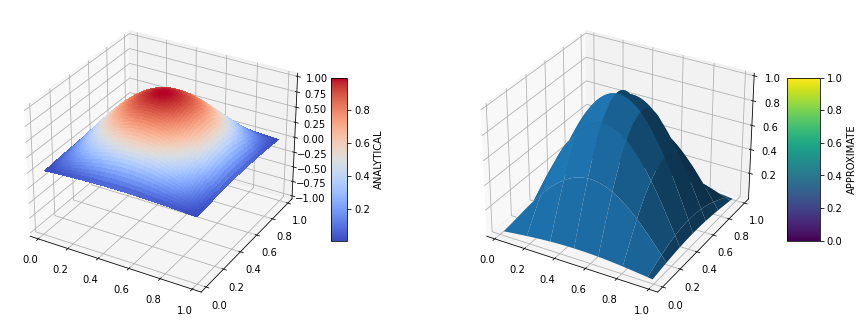

Plot of Analtical and Approximate superposed


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


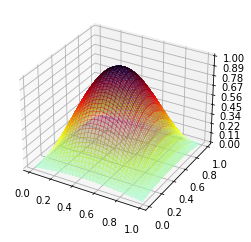

In [4]:
h =(1/64)
a = [0,1]
b = [0,1]
A_Matrix=create_matrix(h)
Q_vector=create_right_hand_side(h)
U_numer=MatrixSolve(A_Matrix, Q_vector)
plot_solution( h,U_numer, ftn_u_tru=u )

In [5]:
def compute_error(h_set,a,b):
    l2_error = []

    for h_loc in h_set:
        A_Matrix=create_matrix(h_loc)
        Q_vector=create_right_hand_side(h_loc)

        intr_point=int((a[1]-a[0])/h_loc)-1 
        x_Vlues= np.linspace(a[0]+h_loc,a[1]-h_loc,intr_point)
        y_Vlues= np.linspace(b[0]+h_loc,b[1]-h_loc,intr_point)
        X, Y = np.meshgrid(x_Vlues, y_Vlues)
        U_numer=MatrixSolve(A_Matrix, Q_vector).reshape(intr_point,intr_point)

        l2_error.append(discrete_L2_error(U_numer,u(X,Y), h_loc))
    

    l2_eoc = [np.log(l2_error[i]/l2_error[i+1]
                    ) / np.log(h_set[i]/h_set[i+1]) for i in range(len(l2_error)-1) ]
           
    EOC=pd.DataFrame(list(zip(h_set, l2_error)),
          columns=['h','EOC'])

    return EOC

In [6]:
# Queston 4
h_set = [1/i**2 for i in range(2,10)]
compute_error(h_set,a,b)

,h,EOC
0,0.250000,0.026515
1,0.111111,0.005108
2,0.062500,0.001609
3,0.040000,0.000658
4,0.027778,0.000317
5,0.020408,0.000171
6,0.015625,0.000100
7,0.012346,0.000063


### Task 2 (3+3 P)
a) Proof 4) of Lemma 1.2, i.e., show that for $u \in C^4([x-h,x+h])$:

\begin{aligned}
u^{''}(x)=\frac{u(x+h)-2u(x)+u(x-h)}{h^2}+h^2 R \text{ and } |R| \leq \frac{1}{12}||u^{(4)}||_{\infty}
\end{aligned}

---

<span style="color:blue">**solution**
    
<span style="color:blue">  Consider the Taylor expansions

<span style="color:blue"> $$
u(x+h)= u(x)+hu'(x)+\frac{h^2}{2}u''(x)+\frac{h^3}{6}u'''(x)+\frac{h^4}{24}u''''(x)+\cdots\qquad(1)$$
<span style="color:blue"> $$
u(x-h)= u(x)-hu'(x)+\frac{h^2}{2}u''(x)-\frac{h^3}{6}u'''(x)+\frac{h^4}{24}u''''(x)+\cdots\qquad(2)$$

<span style="color:blue"> Adding (1) and (2) gives$$u(x+h)+u(x-h)=2u(x)+h^2u''(x)+\frac{h^4}{12}u''''(x)+\frac{h^6}{360}u''''''(x)$$
    
<span style="color:blue"> let $$ R=\frac{h^4}{12}u''''(x)+\frac{h^6}{360}u''''''(x)+\cdots$$ then
    
 <span style="color:blue"> $$|R| =|\frac{h^4}{12}u''''(x)+\frac{h^6}{360}u''''''(x)+\cdots| $$
     Using tiragular inequality
     
     
 <span style="color:blue">  $$ |R| \leq|\frac{h^4}{12}u''''(x)|+|\frac{h^6}{360}u''''''(x)+\cdots|\\
     \qquad \leq \frac{h^4}{12}\sup_{x}|u''''(x)|+\frac{h^6}{360}\sup_{x}|u''''''(x)|\\
     \qquad \leq \frac{h^4}{12}||u^{(4)}||_{\infty}+\frac{h^6}{360}||u^{(6)}||_{\infty}\\
    $$
     
<span style="color:blue"> since $R$ is propotonal to $h$, higher powers $\rightarrow 0$ as $h\rightarrow 0$ thus$$|R| \leq \frac{h^4}{12}||u^{(4)}||_{\infty}$$

<span style="color:blue"> making $u''(x)$ the subject 
$$ u^{''}(x)=\frac{u(x+h)-2u(x)+u(x-h)}{h^2}+h^2 R \quad |R| \leq \frac{1}{12}||u^{(4)}||_{\infty}$$




---

---
b) Show that for $u \in C^3([x-h_1,x+h_2])$, there exists $C>0$, such that:

\begin{aligned}
u^{''}(x)=\frac{2}{h_1+h_2}\left[\frac{1}{h_1}u(x-h_1)-\left(\frac{1}{h_1}+\frac{1}{h_2}\right)u(x)+\frac{1}{h_2}u(x+h_2)\right]+ \max{\{h_1,h_2\}}R 
\end{aligned}

$\quad$ and $|R| \leq C||u^{(3)}||_{\infty}$.

<span style="color:blue">**solution**
    
<span style="color:blue">  Consider the Taylor expansions

<span style="color:blue"> $$
u(x+h_2)= u(x)+h_2u'(x)+\frac{h_2^2}{2}u''(x)+\frac{h_2^3}{6}u'''(x)+\frac{h_2^4}{24}u''''(x)+\cdots\qquad(3)$$
<span style="color:blue"> $$
u(x-h_1)= u(x)-h_1u'(x)+\frac{h_1^2}{2}u''(x)-\frac{h_1^3}{6}u'''(x)+\frac{h_1^4}{24}u''''(x)+\cdots\qquad(4)$$

<span style="color:blue"> Adding $\frac{1}{h_2}$(3) and $\frac{1}{h_1}$(4) gives$$ \frac{1}{h_2}u(x+h_2)+\frac{1}{h_1}u(x-h_1)=(\frac{1}{h_2}+\frac{1}{h_1})u(x)+\frac{h_1+h_2}{2}u''(x)+\frac{h_2^2-h_1^2}{6}u'''(x)$$

<span style="color:blue"> making $u''(x)$ the subject 
$$ u^{''}(x)=\frac{2}{h_1+h_2}\left[\frac{1}{h_1}u(x-h_1)-\left(\frac{1}{h_1}+\frac{1}{h_2}\right)u(x)+\frac{1}{h_2}u(x+h_2)\right]+  \max{\{h_1,h_2\}}R$$


<span style="color:blue"> we need to find a $C>0$ such that $|R| \leq C||u^{(3)}||_{\infty}$. 
    
<span style="color:blue"> from $$\frac{h_1+h_2}{2}max\{h_1,h_2\}R=\frac{h_2^2-h_1^2}{6}u'''(x)+\frac{h_2^3+h_1^3}{12}u''''(x)+\cdots$$ 
    
<span style="color:blue">     neglecting the higher powers of $h$
        
   
<span style="color:blue"> applying triangular inequality$$|R|=\Big|\frac{2}{(h_1+h_2)max\{h_1,h_2\}}\left[\frac{h_2^2-h_1^2}{6}u'''(x)\right]\Big|\\
\qquad \leq \frac{1}{3}\big|\frac{1}{(h_1+h_2)max\{h_1,h_2\}}\big||(h_2^2-h_1^2)u'''(x)|\\
\qquad \leq \frac{1}{3}\big|\frac{1}{max\{h_1,h_2\}^2}\big|(|h_2^2|+|h_1^2)|)|u'''(x)|\\
\qquad \leq \frac{1}{3}\frac{2}{max\{h_1,h_2\}^2}max\{h_1,h_2\}^2|u^{(3)}|_{\infty}\\
$$
<span style="color:blue"> Therefore $$C=\frac{2}{3} $$    
    

### Task 3 (3+2+5 P)

 Consider the fourth order boundary value problem:
 Find $u \in C^4(\Omega) \cap C^1(\bar \Omega)$ such that
 \begin{aligned}
   \Delta^2 u - \Delta u &= f \qquad \text{ in } \Omega\,,\\
   \Delta u \cdot n= u &= 0 \qquad\text{ on } \partial\Omega\,.
 \end{aligned}

  a) Choose $V$ and derive a weak (variational) formulation:   
  Find $u\in V$ such that $a(u,v) = b(v) \quad \forall v \in V$.
  
  b) Why does the boundary condition make sense in your $V$?
  
  c) Show that your weak (variational) formulation allows for a unique solution. 
  
  Hints:
  - Proceed as we did in the lecture (Lax-Milgram). You may also use the result of Exercise 1.10 in the lecture notes (Google Drive).
  - You may use without prove that for $u \in H^2_0(\Omega)$
  \begin{equation*}
   \| \Delta u \|_{L^2(\Omega)} = \| D^2 u \|_{L^2(\Omega)} = |u|_{H^2(\Omega)}.
  \end{equation*}


<span style="color:blue">**solution (a)** 
    
<span style="color:blue">Let $V=\{v\in H^{2}_0(\Omega): \quad \gamma(v)=0 \text{ on } s \}$

<span style="color:blue">Assumig that $u\in H^{4}(\Omega)\cap H^{2}_0(\Omega)$ then $\Delta u\in H^2(\Omega)$ 

<span style="color:blue">Multiplying  by $v$
    
<span style="color:blue">   $$  \int_{\Omega}(\Delta^2 u - \Delta u)v = \int_{\Omega}fv $$
    
<span style="color:blue">  applying Greens formular \begin{align*} \int_{\Omega}( \Delta^2 u)v  dx &=  \int_{\Omega}(\Delta(\Delta u))v\\
    &=\int_\Omega \Delta u\Delta vdx +\int_{\partial \Omega}  \gamma_0(v)\gamma_1 (\Delta u)-\gamma_1(v)\gamma_0(\Delta u) ds\\
   &=\int_{\Omega}\Delta u\Delta v \end{align*} 
     
<span style="color:blue">and $$  \int_{\Omega}( \Delta u)v  dx =-\int_\Omega \nabla u\cdot\nabla vdx + \int_{\partial \Omega}   \Delta u\cdot n v  ds,$$

    
<span style="color:blue"> since $\gamma_0(v)=\gamma_1 (v)=0 $ for all $v\in H^{2}_0(\Omega)$  the variational 
    formulation becomes;
    
<span style="color:blue"> for all $v \in V$, $$\int_{\Omega}(\Delta u\Delta v+\nabla u\cdot\nabla v)dx=\int_{\Omega}fv$$
    
<span style="color:blue"> with $$a(u,v)=\int_{\Omega}(\Delta u\Delta v+\nabla u\cdot\nabla v)dx$$ and $$b(v)=\int_{\Omega}fv$$
    
<span style="color:blue">**solution (b)** 
    
<span style="color:blue"> The boundary conditions makes sense since the space $v\in H^{2}_0(\Omega)$ incoporates all of them by `general trace theorem(trace operator)`

<span style="color:blue">**solution (c)** 
    
<span style="color:blue"> Acording to `Lax-Milgram Theorem`, $V$ has to satisfies;
 * <span style="color:blue">The bilinear form  is **continous** i.e, we find M such that $|a(u,v)|\leq M||u||_v||v||_v \quad \text{for all}\quad u,v \in V $
    
    <span style="color:blue"> For all $(u,v)\in V \times V$,
    <span style="color:blue"> It is clear that $a$ is a bilinear form and for all $u,v\in V$
\begin{align*}
\left | a(u,v) \right |&=\left | \int_{\Omega} \Delta u.\Delta v dx + \int_{\Omega}\nabla u.\nabla v dx\right |\\
&\leq \int_{\Omega}\left|\Delta u\right|\left|\Delta v\right|dx+\int_{\Omega}\left|\nabla u\right|\left|\nabla v\right|dx\\    
&\leq || \Delta v ||_{L^{2}(\Omega)}|| \Delta v ||_{L^{2}(\Omega)}+|| \Delta u ||_{L^{2}(\Omega)}|| \Delta v ||_{L^{2}(\Omega)}
\\
&\leq M|| u ||_{H^{2}(\Omega)}||  v ||_{H^{2}(\Omega)}
\end{align*}
 * <span style="color:blue">The bilinear form  is  **V- elliptic(coerciveness)** i.e, we find $\alpha$ such that $a(v,v)\geq \alpha||v||^2_v\quad \text{for all}\quad v \in V $
        
     <span style="color:blue"> \begin{align*}a(v,v)&=\int_{\Omega}( (\Delta v)^2+(\nabla v )^2)  dx \\
         &=||D^2v||^2_{L^2(\Omega)}+||\nabla v||^2_{L^2(\Omega)}\\
        & \geq \alpha||{v}||^2_{H^2(\Omega)}\end{align*}
        
        
        
 * <span style="color:blue"> The linear form is  **continous** i.e, we find C such that $b(v)\geq \alpha||v||_v\quad \text{for all}\quad v \in V $
    
    
   <span style="color:blue"> \begin{align*} |b(v)|&=\big |\int_{\Omega} f vdx\big| \\
    &\leq ||f||_{L^2_{\Omega}}||v||_{H^2(\Omega)} \\  
        \end{align*}
   
        
<span style="color:blue">  Therefore there is only one solution   
    

### Task 4 (4 P)

Consider the following partial differential equation on a bounded domain $\Omega \subset \mathbb{R}^2$ with $f \in L^2(\Omega)$:
 \begin{align*}
  -\Delta u + 4 \partial_2 u + u &= f & & \text{in } \Omega \,,\\
  u &= 0 & & \text{on } \partial\Omega \,.
 \end{align*}
  a) Determine the weak (variational) formulation (including an appropriate choice of spaces) and corresponding bilinear form.
  
  b) Show that the weak (variational) problem has a unique solution. Hint: rewrite this as diffusion-advection-reaction equation, then you can use the result of the lecture.


<span style="color:blue">**solution (a)** 
    
<span style="color:blue"> Assuming  that $u\in H^2(\Omega)$ and we choose a $v\in H_0^1(\Omega)$ the we will have that;
   
  
<span style="color:blue">$$ \int_\Omega [-\Delta u + 4 \partial_2 u + u ]v =\int_\Omega fv $$
 
<span style="color:blue"> integrating by parts  Greens formula we have that 
<span style="color:blue">$$  \int_{\Omega}( \Delta u)v  dx =-\int_\Omega \nabla u\cdot\nabla vdx + \int_{\partial \Omega}   \Delta u\cdot n v  ds,$$
    
<span style="color:blue">\begin{equation*}
    \int_{\Omega} \nabla u \cdot \nabla v  dx + 4 \int_{\Omega} (\partial_2 u) v \, dx + \int_{\Omega} uv \, dx = \int_{\Omega} f v  dx 
\end{equation*}
    
<span style="color:blue">we now let $V \in H_0^1(\Omega)$ such that:
    

<span style="color:blue">The corresponding bilinear form on $V \times V$ is:
\begin{equation*}
    a(u,v) = \int_{\Omega} \nabla u \cdot \nabla v \, dx + 4 \int_{\Omega} (\partial_2 u) v \, dx + \int_{\Omega} uv \, dx.
\end{equation*}
    
<span style="color:blue">and the linear form $$b(v)=\int_{\Omega} f vdx $$
    
<span style="color:blue"> The variational formulation reads $$\forall v \in V,\qquad a(u,v)= b(v)$$

----
    
    
<span style="color:blue">**solution (b)**
    
<span style="color:blue"> Acording to `Lax-Milgram Theorem`, $V$ has to satisfies;
 * <span style="color:blue">The bilinear form  is **continous** i.e, we find M such that $|a(u,v)|\leq M||u||_v||v||_v \quad \text{for all}\quad u,v \in V $
    
    <span style="color:blue"> For all $(u,v)\in V \times V$,
    <span style="color:blue"> \begin{align*}|a(u,v)|&=\big|\int_{\Omega} \nabla u \cdot \nabla v \, dx + 4 \int_{\Omega} (\partial_2 u)  v\, dx + \int_{\Omega} uv \, dx \big|\,,\\
   &\leq \int_{\Omega}| \nabla u \cdot \nabla v | dx +4 \int_{\Omega}| (\partial_2 u)  v \, |dx + \int_{\Omega}| uv |\, dx\,,\\
   & \leq  ||{\nabla u}||_{L^2(\Omega)}||{\nabla v}||_{L^2(\Omega)}+4||{\partial_2 u}||_{L^2(\Omega)}||{v}||_{L^2(\Omega)}+||{u}||_{L^2(\Omega)}||{v}||_{L^2(\Omega)} \\
        & \leq  ||{u}||_{H^1(\Omega)}||{v}||_{H^1(\Omega)}+4||{ u}||_{H^1(\Omega)}||{v}||_{H^1(\Omega)}+||{u}||_{^2(\Omega)}||{v}||_{H^1(\Omega)}\\
        & \leq  6||{u}||_{H^1(\Omega)}||{v}||_{H^1(\Omega)}\end{align*}
        
       
 * <span style="color:blue">The bilinear form  is  **V- elliptic(coerciveness)** i.e, we find $\alpha$ such that $a(v,v)\geq \alpha||v||^2_v\quad \text{for all}\quad v \in V $
        
     <span style="color:blue"> \begin{align*}a(v,v)&=\int_{\Omega}(|| \nabla v ||^2 + 4||\partial_2 v||^2+ v^2)  dx \\
        & \geq  \alpha||{v}||^2_{H^1(\Omega)}\end{align*}
        
        
        
 * <span style="color:blue"> The linear form is  **continous** i.e, we find C such that $b(v)\geq \alpha||v||_v\quad \text{for all}\quad v \in V $
    
    
   <span style="color:blue"> \begin{align*} |b(v)|&=\big |\int_{\Omega} f vdx\big| \\
    &\leq ||f||_{L^2_{\Omega}}||v||_{H^1(\Omega)} \\  
        \end{align*}
   
        
<span style="color:blue">  Therefore there is only one solution   
    
